In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

## Linear Regression
##### This notebook aims to predict where the ISS would be located some time after the last recording, using Linear Regression.

In [2]:
# Reading data in
ISS_locations_df = pd.read_csv(r'/home/stefanie/Python/Find_ISS/Find_ISS/ISS_locations.csv')
ISS_locations_df

,timestamp,latitude,longitude
0,2022-04-11 20:59:33,-34.4130,2.9362
1,2022-04-11 21:00:33,-36.9134,6.3313
2,2022-04-11 21:01:33,-39.2942,9.9669
3,2022-04-11 21:02:33,-41.5185,13.8343
4,2022-04-11 21:03:33,-43.6022,18.0200
...,...,...,...
86,2022-04-11 22:25:32,-15.2545,-39.2972
87,2022-04-11 22:26:32,-18.1845,-36.9443
88,2022-04-11 22:27:32,-21.1021,-34.4821
89,2022-04-11 22:28:32,-23.9745,-31.9120


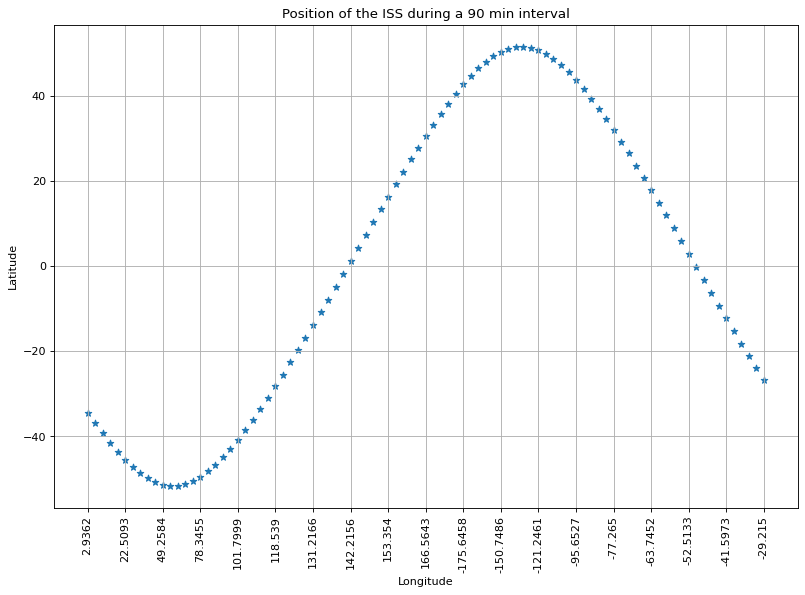

In [11]:
# Plotting the recorded values
plt.figure(figsize=(12, 8), dpi=80)
plt.title('Position of the ISS during a 90 min interval')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.xticks(np.arange(-180, 180, step=5), rotation=90) 
plt.scatter(ISS_locations_df['longitude'].astype(str), ISS_locations_df['latitude'], marker=('*')) #astype(str) is a quickfix preventing matplotlib to sort the longitudes by size

Since the data isn't really suited for linear regression (sinus curve like behavior), we need to select the last 20 values for the model training.

In [4]:
# Cutting the df down to the last 20 rows
latest_ISS_locations_df = ISS_locations_df.iloc[-20:,]
latest_ISS_locations_df.tail()

,timestamp,latitude,longitude
86,2022-04-11 22:25:32,-15.2545,-39.2972
87,2022-04-11 22:26:32,-18.1845,-36.9443
88,2022-04-11 22:27:32,-21.1021,-34.4821
89,2022-04-11 22:28:32,-23.9745,-31.9120
90,2022-04-11 22:29:32,-26.7922,-29.2150


In [6]:
# Hardcoding to keep this notebook clean
x_after_1min = -26.8
x_after_10min = -5.21

Comment: For better predictions we would first have to identify the latitudes after 1 and 10 minutes as a function of time (also applying a regression model).

### Training Linear Regression Model

In [7]:
# Training process
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = latest_ISS_locations_df['longitude'],
    y = latest_ISS_locations_df['latitude'])

print('intercept: ', intercept)
print('slope: ', slope)

intercept:  -65.55312488388493
slope:  -1.2970407632741427


In [8]:
# Predicting longitude 1 periods out
predicted_latitude = np.ceil(slope * x_after_1min  + intercept)
print('Predicted position after 1 minute: longitude=', predicted_latitude, ', latitude = -26.8')

# Predicting longitude 10 periods out 
predicted_latitude = np.ceil(slope * x_after_10min + intercept)
print('Predicted position after 10 minutes: longitude=', predicted_latitude, ', latitude = -5.21')


Predicted position after 1 minute: longitude= -30.0 , latitude = -26.8
Predicted position after 10 minutes: longitude= -58.0 , latitude = -5.21


### Printing the predicted position after 10 minutes

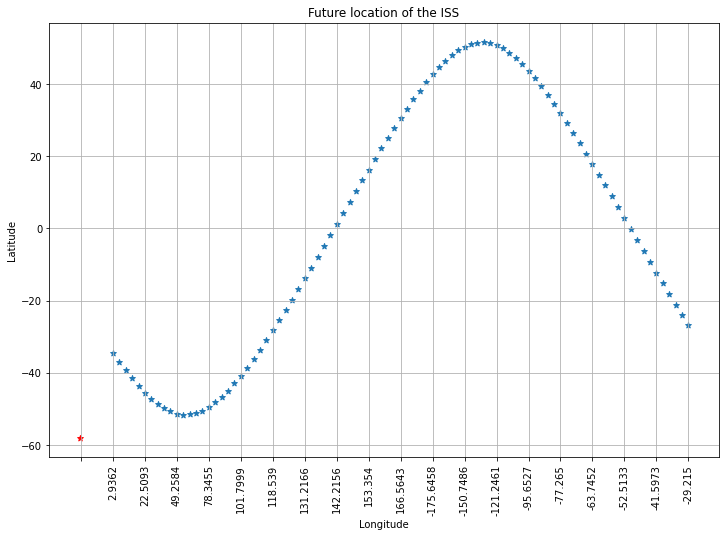

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Future location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.xticks(np.arange(-180, 180, step=5), rotation=90) 
plt.scatter(ISS_locations_df['longitude'].astype(str), ISS_locations_df['latitude'], marker=('*'))
plt.scatter(x_after_10min, [predicted_latitude], color='red', marker=('*'))

Since longitudes aren't evenly distributed over maps, the ISS's trajectory can't properly be modeled with Linear Regression.